<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_R/KNN_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k-NN을 iris 데이터에 적용해서 Species를 분류하는 R 코드

1.  데이터 준비하기

In [1]:
#iris 데이터를 Sepal.Length / Sepal.Width / Species 3가지 변수만 있는 데이터로 단순한 데이터 data 로 바꿔보자.

data <- iris[, c("Sepal.Length", "Sepal.Width", "Species")]

2.  데이터 나누기 (train set, validation set, test set)

data 를 train / valid / test 로 나누자.

In [2]:
# 재현성을 위한 seed 설정
set.seed(123)

# idx 설정 
idx <- sample(x = c("train", "valid", "test"), size = nrow(data), 
              replace = TRUE, prob = c(3, 1, 1)) 
# idx에 따라 데이터 나누기 
train <- data[idx == "train", ] 
valid <- data[idx == "valid", ] 
test <- data[idx == "test", ]

3.  데이터 분포 확인하기

산점도를 그려서 train, valid, test 데이터의 분포를 확인해보자.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



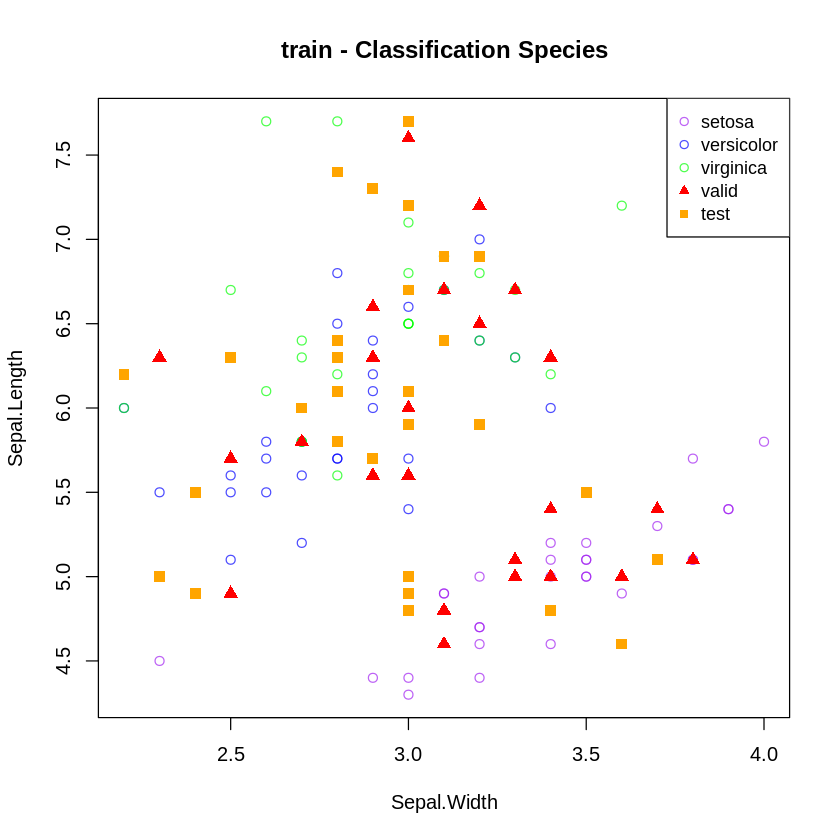

In [3]:
# 색상 투명도 설정을 위한 패키지 설치 및 라이브러리 불러오기 
install.packages("scales") 
library(scales) 
# 이제 alpha 함수를 사용할 수 있다! 
# train 산점도 그리기 
plot(formula = Sepal.Length ~ Sepal.Width, data = train, 
     col = alpha(c("purple", "blue", "green"), 0.7)[train$Species], main = "train - Classification Species") 
# valid 표시하기 
points(formula = Sepal.Length ~ Sepal.Width, data = valid, pch = 17, cex = 1.2, col = "red") 
# test 표시하기 
points(formula = Sepal.Length ~ Sepal.Width, data = test, pch = 15, cex = 1.2, col = "orange") 
# 범례 그리기 
legend("topright", c(levels(data$Species), "valid", "test"), pch = c(1, 1, 1, 17, 15), 
       col = c(alpha(c("purple", "blue", "green"), 0.7), "red", "orange"), cex = 0.9)

4.  x와 y로 나누기

train 을 train_x, train_y로,
valid를 valid_x, valid_y로,
test를 test_x, test_y로 나누자.

In [4]:
# x는 3번째 열을 제외한다는 의미로 -3 
train_x <- train[, -3] 
valid_x <- valid[, -3] 
test_x <- test[, -3] 
# y는 3번째 열만 필터링한다는 의미로 3 
train_y <- train[, 3] 
valid_y <- valid[, 3] 
test_y <- test[, 3]

5.  knn 적용하기

먼저 k가 1일 때를 해본다. 다수결이 동점인 경우 (ties break) 랜덤성이 있으므로 재현성을 위해 seed를 설정했다.

In [5]:
# knn 함수를 사용하기 위해 class 패키지를 설치하고 라이브러리 불러오기 
install.packages("class") 
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.6551724

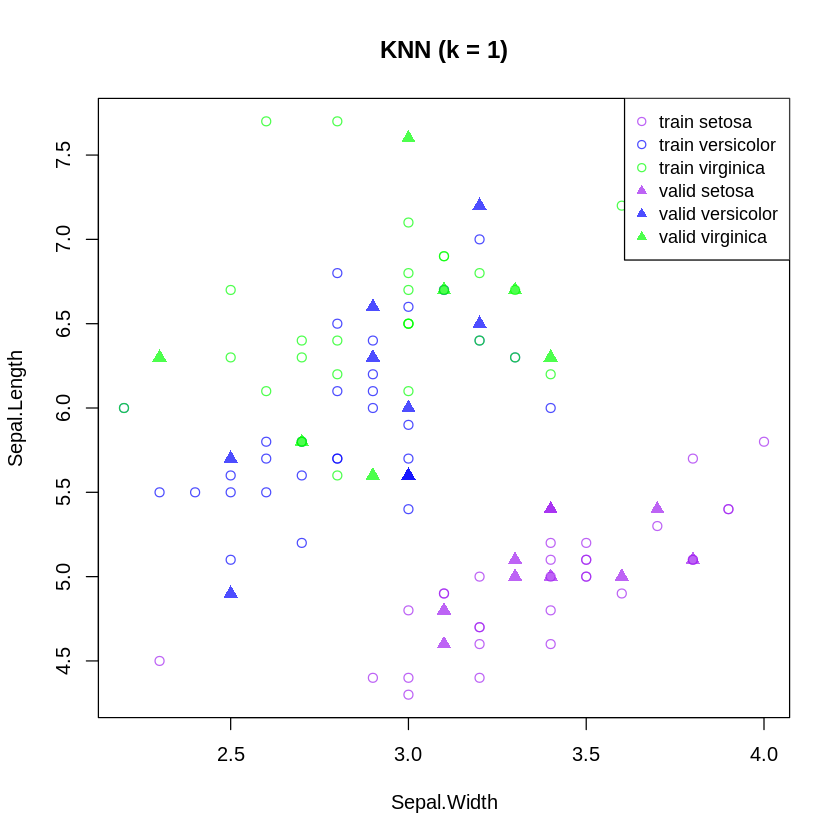

In [6]:
# k = 1 일 때 
set.seed(1234) 
knn_1 <- knn(train = train_x, test = valid_x, cl = train_y, k = 1) 
# train 산점도 그리기 
plot(formula = Sepal.Length ~ Sepal.Width, data = train, 
     col = alpha(c("purple", "blue", "green"), 0.7)[train$Species], 
     main = "KNN (k = 1)")
# knn valid 결과 표시하기 
points(formula = Sepal.Length ~ Sepal.Width, data = valid, 
       pch = 17, cex = 1.2, col = alpha(c("purple", "blue", "green"), 0.7)[knn_1]) 
# 범례 그리기 
legend("topright", c(paste("train", levels(train$Species)), paste("valid", levels(valid$Species))), 
        pch = c(rep(1, 3), rep(17, 3)), col = c(rep(alpha(c("purple", "blue", "green"), 0.7), 2)), 
        cex = 0.9) 
# 분류 정확도 계산하기 
accuracy_1 <- sum(knn_1 == valid_y) / length(valid_y) 
accuracy_1

산점도가 그려지는데, setosa는 잘 분류되는 반면 versicolor와 virginica는 분류 오류가 있음을 알 수 있다.

이번에는 k가 21일 때를 해본다.

[1] 0.8275862

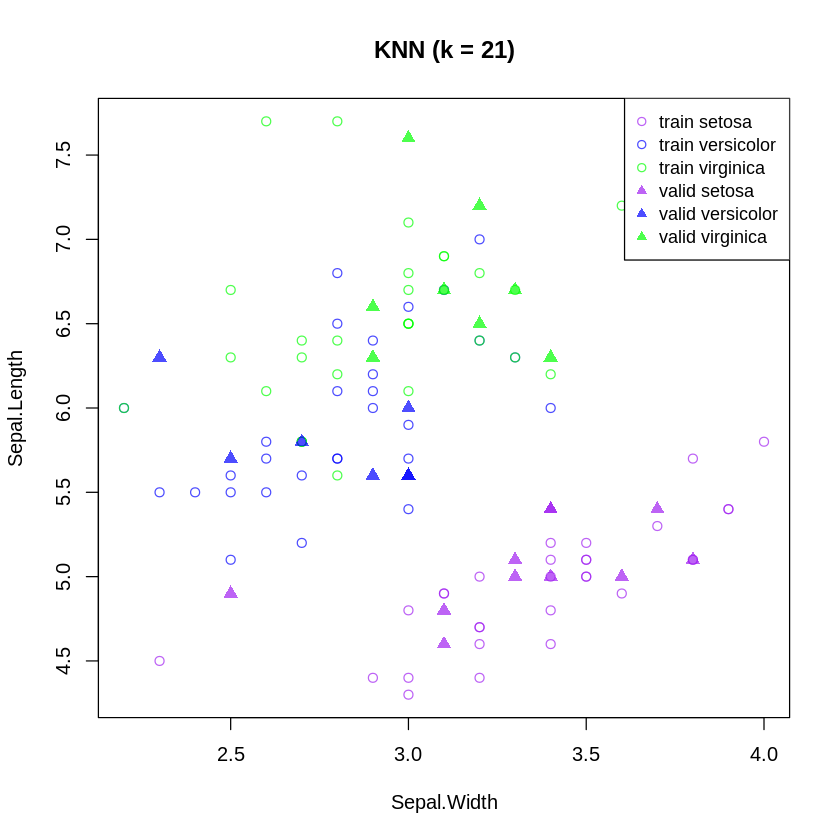

In [7]:
# k = 21 일 때 
set.seed(1234) 
knn_21 <- knn(train = train_x, test = valid_x, cl = train_y, k = 21) 
plot(formula = Sepal.Length ~ Sepal.Width, data = train, 
     col = alpha(c("purple", "blue", "green"), 0.7)[train$Species], 
     main = "KNN (k = 21)") 
# knn valid 결과 표시하기 
points(formula = Sepal.Length ~ Sepal.Width, data = valid, pch = 17, cex = 1.2, 
       col = alpha(c("purple", "blue", "green"), 0.7)[knn_21]) 
# 범례 그리기 
legend("topright", c(paste("train", levels(train$Species)), 
       paste("valid", levels(valid$Species))), pch = c(rep(1, 3), rep(17, 3)),
       col = c(rep(alpha(c("purple", "blue", "green"), 0.7), 2)), cex = 0.9) 
# 분류 정확도 계산하기 
accuracy_21 <- sum(knn_21 == valid_y) / length(valid_y) 
accuracy_21

산점도를 보면 k = 1 일 때보다 k = 21 일 때 더 잘 분류되었음을 직관적으로 알 수 있다.

6.  k가 1부터 train 행 수까지 변화할 때 분류 정확도 구하기

반복문 for 를 이용하여 k가 1부터 89 (train 행 수) 까지 변화할 때 분류 정확도가 몇 % 되는지 그래프를 그려보고 최적의 k를 확인해 보자.

[1] 21

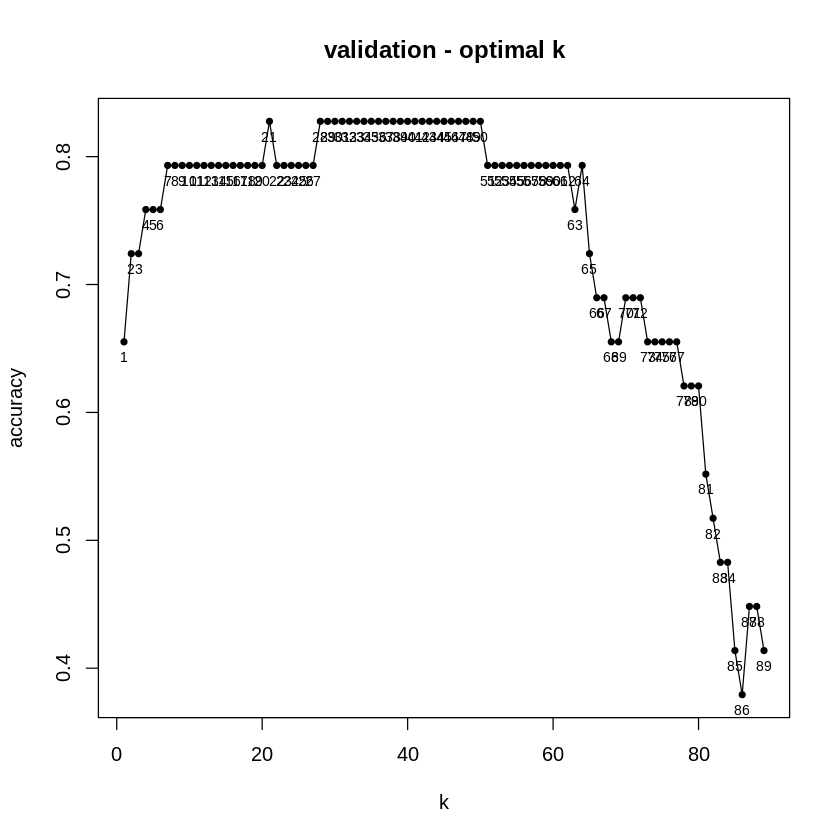

In [8]:
# 분류 정확도 사전 할당 
accuracy_k <- NULL 
# kk가 1부터 train 행 수까지 증가할 때 (반복문) 
for(kk in c(1:nrow(train_x))){ 
  # k가 kk일 때 knn 적용하기 
  set.seed(1234) 
  knn_k <- knn(train = train_x, test = valid_x, cl = train_y, k = kk) 

# 분류 정확도 계산하기 
accuracy_k <- c(accuracy_k, sum(knn_k == valid_y) / length(valid_y)) }
# k에 따른 분류 정확도 데이터 생성 
valid_k <- data.frame(k = c(1:nrow(train_x)), accuracy = accuracy_k) 
# k에 따른 분류 정확도 그래프 그리기 
plot(formula = accuracy ~ k, data = valid_k, type = "o", pch = 20, 
     main = "validation - optimal k") 
# 그래프에 k 라벨링 하기 
with(valid_k, text(accuracy ~ k, labels = rownames(valid_k), pos = 1, cex = 0.7))
# 분류 정확도가 가장 높으면서 가장 작은 k는? 
min(valid_k[valid_k$accuracy %in% max(accuracy_k), "k"])

그래프를 보면 알 수 있듯이 k = 21일 때 정확도가 가장 높으면서 k가 가장 작기 때문에 우리는 21-NN 모델을 선택하게 된다.

7.  21-NN에 test 데이터 적용하기

k = 21인 knn 모델에 test 데이터를 넣어 분류 결과를 분석해보자.

In [9]:
# 21-NN에 test 데이터 적용하기 
set.seed(1234) 
knn_21_test <- knn(train = train_x, test = test_x, cl = train_y, k = 21) 
# Confusion Matrix 틀 만들기 
result <- matrix(NA, nrow = 3, ncol = 3) 
rownames(result) <- paste0("real_", levels(train_y)) 
colnames(result) <- paste0("clsf_", levels(train_y)) 
# Confusion Matrix 값 입력하기 
result[1, 1] <- sum(ifelse(test_y == "setosa" & knn_21_test == "setosa", 1, 0)) 
result[2, 1] <- sum(ifelse(test_y == "versicolor" & knn_21_test == "setosa", 1, 0)) 
result[3, 1] <- sum(ifelse(test_y == "virginica" & knn_21_test == "setosa", 1, 0)) 
result[1, 2] <- sum(ifelse(test_y == "setosa" & knn_21_test == "versicolor", 1, 0)) 
result[2, 2] <- sum(ifelse(test_y == "versicolor" & knn_21_test == "versicolor", 1, 0)) 
result[3, 2] <- sum(ifelse(test_y == "virginica" & knn_21_test == "versicolor", 1, 0)) 
result[1, 3] <- sum(ifelse(test_y == "setosa" & knn_21_test == "virginica", 1, 0)) 
result[2, 3] <- sum(ifelse(test_y == "versicolor" & knn_21_test == "virginica", 1, 0)) 
result[3, 3] <- sum(ifelse(test_y == "virginica" & knn_21_test == "virginica", 1, 0))

# Confusion Matrix 출력하기 
result 
# 최종 정확도 계산하기 
sum(knn_21_test == test_y) / sum(result)

,clsf_setosa,clsf_versicolor,clsf_virginica
real_setosa,9,0,0
real_versicolor,1,8,4
real_virginica,0,2,8


[1] 0.78125

최종적으로 아래와 같이 Confusion Matrix와 최종 정확도가 출력된다.

해석해보자면, 실제 setosa인데 제대로 경우가 9건이고 다른 Species로 분류된 경우는 0건이다.

그리고 실제 versicolor인데 setosa로 분류된 경우가 1건, 제대로 분류된 경우가 8건, virginica로 분류된 경우가 4건이다.

또 실제 virginica인데 setosa로 분류된 경우는 0건, versicolor로 분류된 경우가 2건, 제대로 분류된 경우가 8건이다.

최종적으로 이 데이터에 대한 21-NN 모델의 분류 정확도는 78.1% 라고 결론 지을 수 있다.